In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.ones(3,2) # 3 by 2 행렬을 만드는데 모든 element 값이 1
print(x)

x = torch.zeros(3,2)  # 3 by 2 행렬을 만드는데 모든 element 값이 0
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


# 랜덤변수 generation
- rand ~ uniform distribution (0,1)

- randn ~ normal( mu = 0, sigma = 1)

In [ ]:
# 가중치를 random하게 초기화하기 위해 랜덤변수 generation
torch.manual_seed(2) # 랜덤한 숫자 만들기 위해 seed가 주어져야함 (제 1 원인을 고정) , 만약 깃허브 코드 상 동일한 결과 출력하고 싶을 때, 시드 고정하는 것도 유용할 것
x = torch.rand(3,2)
print(x)

x = torch.randn(3,3)
print(x)

x2 = torch.rand(3,2)*2 -1 # 범위 -1~1
print(x2)


tensor([[0.6147, 0.3810],
        [0.6371, 0.4745],
        [0.7136, 0.6190]])
tensor([[-2.1409, -0.5534, -0.5000],
        [-0.0815, -0.1633,  1.5277],
        [-0.4023,  0.0972, -0.5682]])
tensor([[-0.0480, -0.5599],
        [-0.5668, -0.4858],
        [-0.9084, -0.6490]])


# 슬라이싱

In [ ]:
x = torch.tensor([[1,2],
                 [3,4],
                 [5,6]])
print(x[:,1]) # 모든 행에서 1열을 출력하시오.
print(x[0,:])
y = x[1,1]
print(y)

tensor([2, 4, 6])
tensor([1, 2])
tensor(4)


# reshape

- `view` 라고 사용!!
    - view(첫번째 입력 파라미터, -1) : 첫번째 입력 파라미터에 따라서 자동적으로 채워주는데 사용(유용)

In [ ]:
x = torch.tensor([[1,2],
                 [3,4],
                 [5,6]])

y = x.view(2,3)
print(x)
print(y)

y= x.view(6,-1)
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


# 텐서 간의 연산

- `add_(x)` : y에다가 x를 바로 더해주는 것
    - 그냥 일반적인 더하기는 메모리측면에서 비효율적
    - **즉, inplace=True 같은 역할로, 바로 y값을 더해주는 것!!**

In [ ]:
x = torch.ones([3,2])
y = torch.ones([3,2])

z = x+y #텐서 간의 합
z = torch.add(x, y) #텐서 간의 합
print(z)

z = x-y
z = torch.sub(x, y)
print(z)

y.add_(x) #y에 x를 더한다 (메모리 효율)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


# PyTorch to Numpy bridge

- Torch와 Numpy
    - Torch는 GPU ram에서 돌아가고, gpu memory에 tensor가 저장되어 있음
    - numpy는 cpu ram에서 돌아가고, ndarray가 저장되어 있음 
    - 그러나 gpu ->cpu, cpu-> gpu 보내는것은 병목이 존재할 수 있으므로 하나에서 다 끝내는 것이 좋을 듯
- `.numpy()`: 즉 torch의 tensor를 ndarray로 변환하는 함수
- `.from_numpy() : ndarray -> tensor

In [ ]:
x = torch.linspace(0,1,steps = 5) # linear하게 벡터를 만드는데, 0에서 1까지 step만큼 쪼갠다.
x_np = x.numpy() #torch에서 만든 tensor의 데이터타입을 numpy로 바꿔줌
print(type(x), type(x_np))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


# CUDA Support

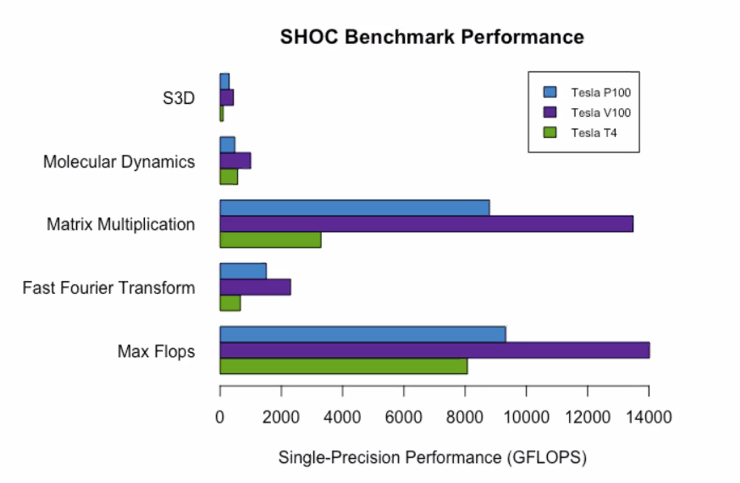

In [ ]:
print(torch.cuda.device_count()) # 0이면 gpu 사용 불가, 1이면 gpu 사용 가능함

#t4, t100 제공함 colab
print(torch.cuda.get_device_name(0))

1
Tesla V100-SXM2-16GB


In [ ]:
cuda0 = torch.device('cuda:0') #gpu에 대한 객체
%time
# gpu 에서 matrix 연산 
a = torch.ones(3,2,device=cuda0)
b = torch.ones(3,2,device=cuda0)
c = a*b
print(c)

CPU times: user 0 ns, sys: 2 µs, total: 2 µs
Wall time: 4.53 µs
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], device='cuda:0')


In [ ]:
%time
a = torch.ones(3,2)
b = torch.ones(3,2)
c = a*b
print(c)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


# Automatic Differentiation - autograd package

- PyTorch에서의 큰 장점이자, 미분을 자동으로 해주는 것
- `requires_grad = True` : matrix안에 미분값을 저장하게 하는 것

In [ ]:
x = torch.ones([3,2], requires_grad=True)
print(x)

y = x+5
print(y)

z = y*y + 1
print(z)

t = torch.sum(z)
print(t)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)
tensor(222., grad_fn=<SumBackward0>)


- `.backward()` : 자기 자신을 t로 미분한 미분값을 모두 저장하게 됨

In [ ]:
t.backward() # t ,z, y의 x에 대한 미분값이 다 저장됨
print(x.grad) # d(t) /dx = 2y+1 (x=1, y=6, where y= x+5, t = sum(y*y) )

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])
